In [1]:
!pip install keras tensorflow scikit-learn


In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [4]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32')

X_train /= 255
X_test /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
model = Sequential()
model.add(Dense(64, input_dim=28 * 28, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:


history = model.fit(X_train, y_train, epochs=30, batch_size=100, verbose=2, validation_data=(X_test, y_test))




Epoch 1/30
600/600 - 3s - loss: 0.1394 - accuracy: 0.9592 - val_loss: 0.1259 - val_accuracy: 0.9618 - 3s/epoch - 4ms/step
Epoch 2/30
600/600 - 3s - loss: 0.1103 - accuracy: 0.9672 - val_loss: 0.1125 - val_accuracy: 0.9652 - 3s/epoch - 4ms/step
Epoch 3/30
600/600 - 2s - loss: 0.0915 - accuracy: 0.9728 - val_loss: 0.1021 - val_accuracy: 0.9691 - 2s/epoch - 3ms/step
Epoch 4/30
600/600 - 2s - loss: 0.0788 - accuracy: 0.9762 - val_loss: 0.1050 - val_accuracy: 0.9700 - 2s/epoch - 3ms/step
Epoch 5/30
600/600 - 5s - loss: 0.0668 - accuracy: 0.9793 - val_loss: 0.0962 - val_accuracy: 0.9710 - 5s/epoch - 9ms/step
Epoch 6/30
600/600 - 3s - loss: 0.0575 - accuracy: 0.9824 - val_loss: 0.0942 - val_accuracy: 0.9725 - 3s/epoch - 6ms/step
Epoch 7/30
600/600 - 4s - loss: 0.0507 - accuracy: 0.9846 - val_loss: 0.0947 - val_accuracy: 0.9718 - 4s/epoch - 6ms/step
Epoch 8/30
600/600 - 2s - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.0958 - val_accuracy: 0.9725 - 2s/epoch - 3ms/step
Epoch 9/30
600/600 - 3s 

In [8]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'Acurácia: {scores[1] * 100:.2f}%')

Acurácia: 97.41%


313/313 [==============================] - 1s 4ms/step


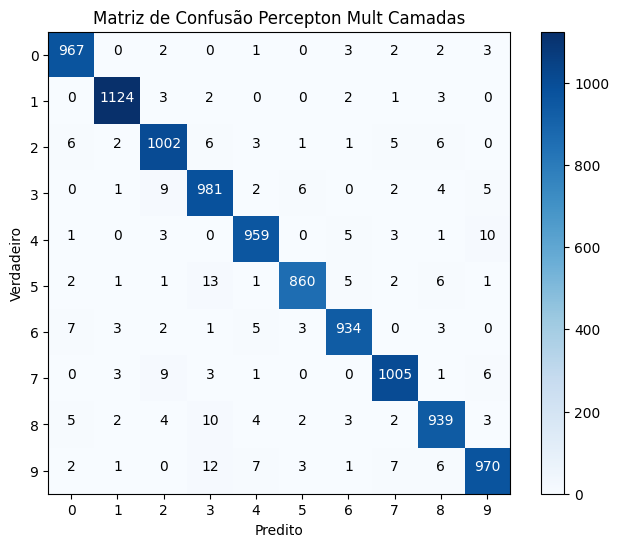

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Matriz de Confusão Percepton Mult Camadas')
plt.colorbar()
thresh = confusion_mtx.max() / 2.
for i in range(10):
    for j in range(10):
        color = 'white' if confusion_mtx[i, j] > thresh else 'black'
        plt.text(j, i, f'{confusion_mtx[i, j]}', horizontalalignment="center", color=color)
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()


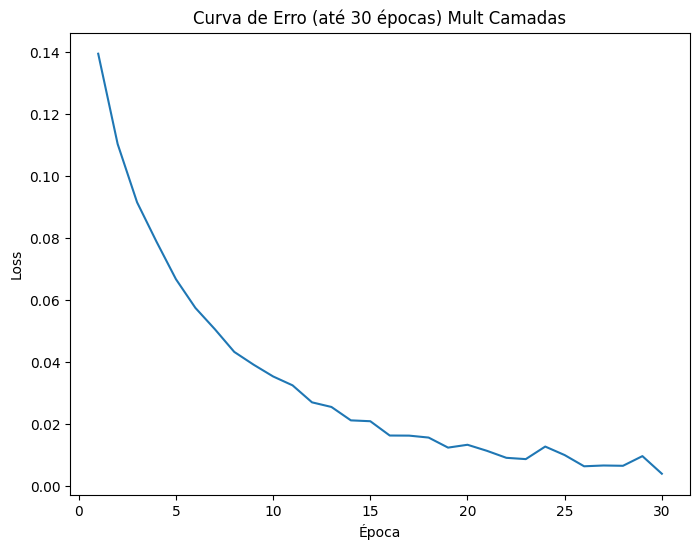

In [12]:
# Plotar a curva de erro
loss = history.history['loss']
plt.figure(figsize=(8, 6))
plt.plot(range(1, 31), loss[:30])
plt.title('Curva de Erro (até 30 épocas) Mult Camadas')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()


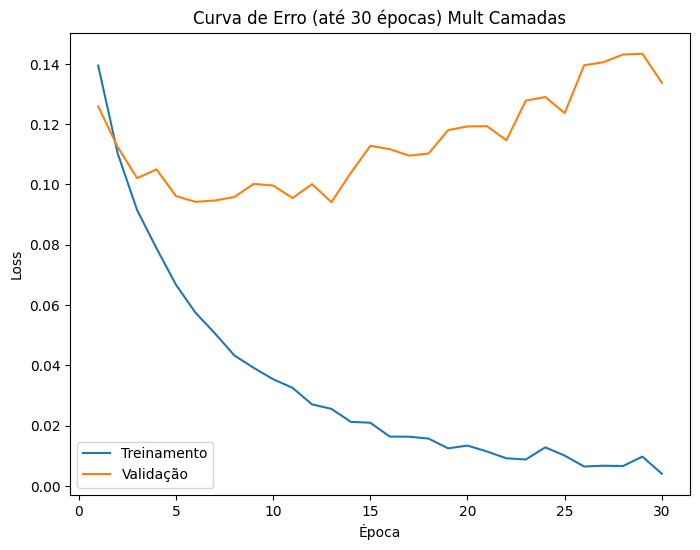

In [14]:
# Plotar a curva de erro
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 6))
plt.plot(range(1, 31), loss[:30], label='Treinamento')
plt.plot(range(1, 31), val_loss[:30], label='Validação')
plt.title('Curva de Erro (até 30 épocas) Mult Camadas')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
600/600 - 5s - loss: 0.3781 - accuracy: 0.8937 - val_loss: 0.1963 - val_accuracy: 0.9424 - 5s/epoch - 9ms/step
Epoch 2/30
600/600 - 4s - loss: 0.1671 - accuracy: 0.9520 - val_loss: 0.1423 - val_accuracy: 0.

NameError: ignored